In [5]:
from pathlib import Path

In [6]:
plot_path = Path('Plots')

In [7]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [8]:
plot_path.mkdir(exist_ok=True, parents=True)

## Load observations: 

In [9]:
import pandas as pd

In [10]:
from bs_fdbck.constants import measurements_path

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [11]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=2, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [12]:
df_hyy_1

,year,month,day,T (degree C),AOD_340 nm,AOD_500 nm,date
0,2012,7,2,16.753083,0.117652,0.065783,2012-07-02
1,2012,7,3,17.366916,0.148389,0.082933,2012-07-03
2,2012,7,4,18.099667,0.144905,0.078666,2012-07-04
3,2012,7,6,18.627832,0.173471,0.087554,2012-07-06
4,2012,7,20,13.770333,0.149718,0.090444,2012-07-20
...,...,...,...,...,...,...,...
65,2018,8,8,20.297500,0.084738,0.047252,2018-08-08
66,2018,8,16,17.330334,0.229233,0.149357,2018-08-16
67,2018,8,19,15.192917,0.088741,0.056444,2018-08-19
68,2018,8,21,11.036416,0.108817,0.073775,2018-08-21


### Yearly medians:


In [13]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=2, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)',
                             'AOD_340 nm.1':'AOD_340 nm',
                             'AOD_500 nm.1':'AOD_500 nm',
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,year,T (degree C),AOD_340 nm,AOD_500 nm
0,2012,17.114417,0.151092,0.088641
1,2013,NaN,NaN,NaN
2,2014,NaN,NaN,NaN
3,2015,16.632333,0.108286,0.060617
4,2016,NaN,NaN,NaN
5,2017,14.836667,0.072336,0.049469
6,2018,21.881499,0.211001,0.135537


In [14]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

In [15]:
df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

In [16]:
import pandas as pd

In [17]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

In [18]:
df_hyy_1 = df_hyy_1.set_index('date')

<AxesSubplot:ylabel='Frequency'>

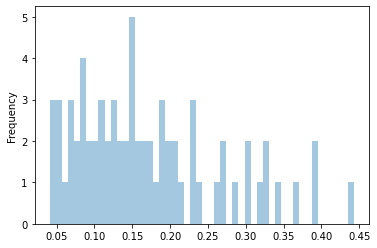

In [19]:
df_hyy_1['AOD_340 nm'].plot.hist(bins=50, alpha=0.4, label='obs')


## load models:

## Read in model data. 

In [20]:
from bs_fdbck.preprocess.launch_monthly_station_collocation import launch_monthly_station_output
from bs_fdbck.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.data_info.variable_info import list_sized_vars_nonsec, list_sized_vars_noresm
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import numpy as np

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

## Settings:

In [24]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [25]:
from_t = '2012-01-01'
to_t = '2015-01-01'
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'


## Cases:

In [32]:
cases_sec = ['OsloAeroSec_intBVOC_f19_f19']

cases_orig = ['OsloAero_intBVOC_f19_f19_mg17_full']

cases_orig_t2 = ['OsloAero_intBVOC_f19_f19_mg17_ssp245']

In [28]:
case_mod = cases_orig[0]

In [29]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-04-07 20:09:03,292 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


2022-04-07 20:09:03,292 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


In [30]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
      'CLDTOT','CDOD550','CDOD440',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 


In [31]:
for case_name in cases_sec:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
File //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2011-01-01_2015-01-01_hour_locations.nc not found
Running collocate montly
CHECKING if raw load necessary for 2011-01-01-2011-02-01
File //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2011-01-01_2011-02-01_hour_locations.nc not found
Loading input dataset from raw file:


2022-04-07 20:09:06,765 useful_scit  INFO     Path file list:


2022-04-07 20:09:06,765 useful_scit  INFO     Path file list:


2022-04-07 20:09:06,768 useful_scit  INFO     []


2022-04-07 20:09:06,768 useful_scit  INFO     []


OSError: no files to open

In [33]:
for case_name in cases_orig_t2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

2022-04-07 20:21:47,158 useful_scit  INFO     Path file list:


File //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc not found
Running collocate montly
CHECKING if raw load necessary for 2015-01-01-2015-02-01
File //proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2015-02-01_hour_locations.nc not found
Loading input dataset from raw file:
2022-04-07 20:21:47,158 useful_scit  INFO     Path file list:


2022-04-07 20:21:47,161 useful_scit  INFO     ['/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-01-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-03-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-05-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-07-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-09-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-11-00000.nc', '/proj/bolinc/users/x_s

2022-04-07 20:21:47,161 useful_scit  INFO     ['/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-01-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-03-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-05-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-07-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-09-00000.nc', '/proj/bolinc/users/x_sarbl/noresm_archive/OsloAero_intBVOC_f19_f19_mg17_ssp245/atm/hist/OsloAero_intBVOC_f19_f19_mg17_ssp245.cam.h1.2015-01-11-00000.nc', '/proj/bolinc/users/x_s

KeyboardInterrupt: 

In [27]:
dic_ds = dict()
for ca in cases_orig + cases_sec:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    dic_ds[ca]=ds

2022-01-17 14:59:47,981 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/SOA_LV_OsloAero_int

2022-01-17 14:59:59,760 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_in

In [27]:
dic_ds2 = dict()
for ca in cases_orig_t2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    dic_ds2[ca]=ds

2022-01-17 14:59:47,981 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/SOA_LV_OsloAero_int

2022-01-17 14:59:59,760 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/N100_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD500_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/DOD440_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/ACTREL_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_intBVOC_f19_f19/H2SO4_OsloAeroSec_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAeroSec_in

In [1]:
dic_continue = dict(OsloAero_intBVOC_f19_f19_mg17_full='OsloAero_intBVOC_f19_f19_mg17_ssp245')

In [ ]:
for ca in dic_continue.keys():
    ca_c = dic_continue[ca]
    
    if ca in dic_ds.keys() and ca_c in dic_ds2.keys():
        ds = xr.concat([dic_ds[ca].sel(time=slice(from_t, to_t)), dic_ds2[ca_c].sel(time=slice(from_t2, to_t2))], dim='time')

In [28]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [29]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()
    dic_df_all = dict()
    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(station='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*ds_sel['T'])
    
        ds_sel['rho'] = rho.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
    
        dic_df_all[ca] = df.copy()
        df_daily = df.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        df_s.index = df_s.index.rename('date')
        df_merge = pd.merge(df_s, df_hyy_1,how='outer', right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df, dic_df_all


dic_df_sm, dic_df, dic_df_all = get_dic_df_mod(model_lev_i=-1)

SO4_A1
0.17030063
SO4_A2
0.5390032
SO4_AC
0.006460039
SO4_NA
0.026009653
SO4_PR
0.06095547


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19
SO4_A1
0.1709455
SO4_A2
0.5567406
SO4_AC
0.0059770155
SO4_NA
0.011198968
SO4_PR
0.061414376
OsloAeroSec_intBVOC_f19_f19
OsloAeroSec_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


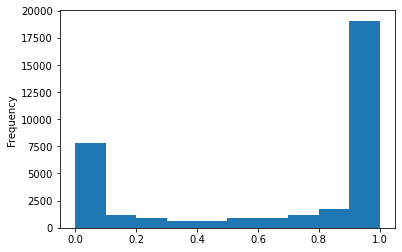

In [30]:
case_sec = cases_sec[0]
ca = case_sec

_df =dic_df_all[case_sec]

_df['CLDTOT'].plot.hist()
_df['CLD_mask'] = _df['CLDTOT']<0.1


<AxesSubplot:ylabel='Frequency'>

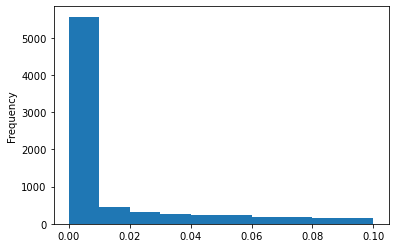

In [31]:
_df['CLDTOT'][_df['CLD_mask']].plot.hist()

<AxesSubplot:xlabel='time'>

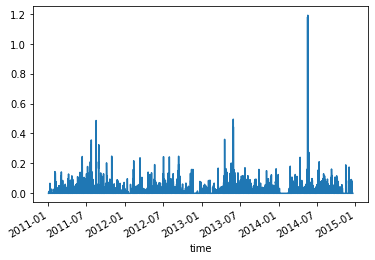

In [32]:
_df['CDOD550'].plot()

<AxesSubplot:xlabel='time'>

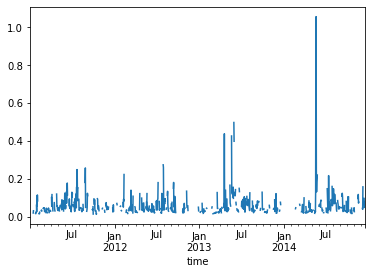

In [33]:
_df['DOD500'][_df['CLD_mask']].resample('D').median().plot()

In [34]:
_df['DOD500'][_df['CLD_mask']].resample('D').median().mean()

0.06436114

<AxesSubplot:xlabel='time'>

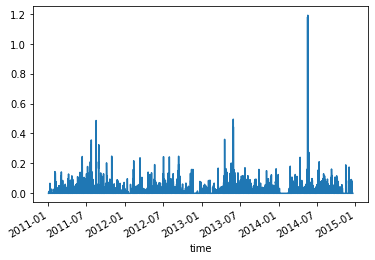

In [35]:
_df['CDOD550'].plot()

In [36]:
_dfd = _df.resample('D').median()

In [37]:
_dfd = _dfd[(_dfd.index.month==7)|(_dfd.index.month==8)]

(0.0, 0.1)

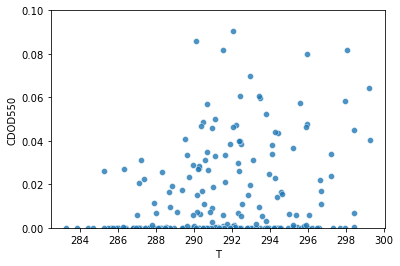

In [38]:
sns.scatterplot(x='T',y='CDOD550', data = _dfd, alpha=0.8)
plt.ylim([0,0.1])

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import numpy as np

In [41]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [42]:
cols = [
    #'#ffff33',
    '#0074c3',
    '#eb4600',
    '#f8ae00',
    '#892893',
    '#66ae00',
    '#00c1f3',
    '#b00029',
]

In [43]:
from matplotlib import cm

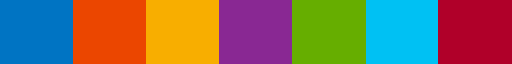

In [44]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

my_cmap = ListedColormap(cols)

my_cmap

In [45]:
ca = cases_orig[0]
df_s = dic_df[ca]
df_s['DOD500'].tail()

date
2018-08-08   NaN
2018-08-16   NaN
2018-08-19   NaN
2018-08-21   NaN
2018-08-29   NaN
Name: DOD500, dtype: float32

In [46]:
type(df_hyy_1['year'][0])

numpy.int64

In [47]:
col_dic = {}
for y,c in zip(range(2012, 2019), cols):
    col_dic[y] =c

In [48]:
df_s[v_x]

NameError: name 'v_x' is not defined

In [ ]:
v_x = 'T_C'
v_y = 'CDOD550'
ca = cases_orig[0]
df_s = dic_df[ca][(dic_df[ca][v_x].notna() &dic_df[ca][v_y].notna())]
df_s = df_s[(df_s[v_x].notnull()&df_s[v_y].notnull())]
#def plot(v_x, 
fig, ax = plt.subplots(figsize=[6,5])
#for y,co in zip(df_s['year'].unique(), cols):
    
#    _df = df_s[df_s['year']==y]
df_s.plot.scatter(x=v_x,y=v_y, ax=ax, c = 'year',cmap = my_cmap, vmax=2018.5, vmin=2010.5)#, label=y )#, c='year', cmap='Paired')
for y,co in zip(df_s['year'].unique(), cols):
    df_s = dic_df_sm[ca]

    _dfm = df_s[df_s['year']==y]
    
    #_dfm = _df.median()
    ax.scatter(_dfm[v_x],_dfm[v_y],c=co, label='__nolegend__' , marker='s', s=200, edgecolor='k')

df_s = dic_df[ca][(dic_df[ca][v_x].notna() &dic_df[ca][v_y].notna())]
df_s = df_s[(df_s[v_x].notnull()&df_s[v_y].notnull())]

x = np.array(df_s[v_x].values).reshape(-1,1)
y=np.array(df_s[v_y].values).reshape(-1,1)

model = LinearRegression().fit(x,y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)
x_s = np.linspace(x.min(),x.max(),10)
a = model.coef_[0]
b = model.intercept_[0]
lab = r'fit: $y= %.3fx %.3f$' %(a,b)
ax.plot(x_s, (a*x_s + b), c='k')
plt.legend(frameon=False, bbox_to_anchor=(1,1,))
#ax.hlines(2000, 5,30, color='k', linewidth=1)

ax.set_ylim([0,.5])
ax.set_xlim([5,30])
ax.set_xlabel(r'T [$^\circ$C]')
#ax.set_ylabel(r'OA [$\mu g m^{-3}$]')


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

custom_lines = [
    Line2D([0], [0],  color='#0074c3',marker='s',markeredgecolor='k',markersize=10, linewidth=0),
    Line2D([0], [0], color='#0074c3',marker='o', linewidth=0),
    Line2D([0], [0], color='k', lw=1),
                #Patch( color='b', lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)
               ]

ax.legend(custom_lines, ['Daily median', 'Summer median',lab,],frameon=False,
          loc='upper left')

In [ ]:
col_dic

In [ ]:
df_s['year'].unique()

In [ ]:
def plot_scatter(v_x,v_y, df_s, df_sy,ca, 
                 xlims=None, 
                 ylims=None,
                 xlab = None,
                 ylab = None,
                 figsize=[6,5],
                 ax = None,
                 #fig = None
                ):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    #for y,co in zip(df_s['year'].unique(), cols):
    
    #    _df = df_s[df_s['year']==y]
    _cols = [col_dic[int(y)] for y in df_s['year'].unique()]
    _my_cmap = ListedColormap(_cols)
    df_s.plot.scatter(x=v_x,y=v_y, ax=ax, 
                      c = 'year',
                      cmap = my_cmap, 
                      vmax=2018.5, vmin=2011.5)#, label=y )#, c='year', cmap='Paired')
    #df_sy = df_s.resample('Y').median()
    for y,co in zip(df_sy['year'].unique(), cols):
        #df_sy = dic_df_sm[ca]
        co = col_dic[int(y)]
        _dfm = df_sy[df_sy['year']==y]
    
        #_dfm = _df.median()
        ax.scatter(_dfm[v_x],_dfm[v_y],c=co, label='__nolegend__' , marker='s', s=200, edgecolor='k')
    
    _df_s = df_s[df_s[v_x].notnull() & df_s[v_y].notnull()]
    x = np.array(_df_s[v_x].values).reshape(-1,1)
    y=np.array(_df_s[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    if b<0:
        sig = ''
    else:
        sig='+'
    if a<1:
        
        lab = r'fit: $y= %.3fx%s%.3f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    elif a>10:
        lab = r'fit: $y= %.1fx%s%.1f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    elif a>100:
        lab = r'fit: $y= %.0fx%s%.0f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    else:
        lab = r'fit: $y= %.2fx%s%.2f$, r$^2$=%.02f' %(a,sig,b, r_sq)
        
        
    ax.plot(x_s, (a*x_s + b), c='k')
    plt.legend(frameon=False, bbox_to_anchor=(1,1,))
    #ax.hlines(2000, 5,30, color='k', linewidth=1)

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)


    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    custom_lines = [
        Line2D([0], [0],  color='#0074c3',marker='s',markeredgecolor='k',markersize=10, linewidth=0),
        Line2D([0], [0], color='#0074c3',marker='o', linewidth=0),
        Line2D([0], [0], color='k', lw=1),
                #Patch( color='b', lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)
               ]

    ax.legend(custom_lines, ['Daily median', 'Summer median',lab,],frameon=False,
          loc='upper left')
    return fig, ax

In [ ]:
mask_obs_AOD500 = dic_df[ca]['AOD_500 nm'].notnull()
mask_obs_AOD340 = dic_df[ca]['AOD_340 nm'].notnull()

## T vs N100

In [ ]:
sns.scatterplot(x='T_C', y='CDOD550', data=df_s)

In [ ]:
dic_df[ca][

In [ ]:
ca = cases_sec[0]
v_x = 'T_C'
v_y = 'CDOD550'
ca = cases_orig[0]
df_s = dic_df[ca].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
#ylims = [0,0.5]
xlab = r'T [$^\circ$C]'
ylab = r'AOD 500'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

In [ ]:
v_x = 'T_C'
v_y = 'DOD500'
ca = cases_sec[0]
df_s = dic_df[ca].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,0.5]
xlab = r'T [$^\circ$C]'
ylab = r'AOD 500'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.2668240488920308
intercept: [-0.04506379]
slope: [[0.0078805]]
Plots/scat_OBS_T _AOD_500 nm.png


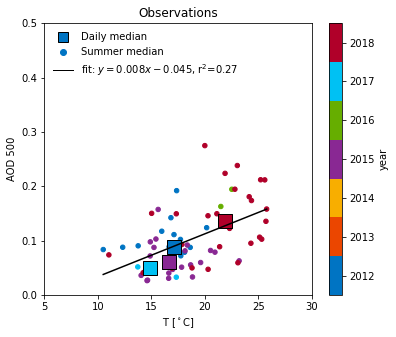

In [133]:

v_x = 'T (degree C)'
v_y = 'AOD_500 nm'
ca ='OBS'
df_s = df_hyy_1.loc['2012':'2018']

df_sy = df_hyy_1y.loc['2012':'2018'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,0.5]
xlab = r'T [$^\circ$C]'
ylab = r'AOD 500'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

No handles with labels found to put in legend.


coefficient of determination: 0.11259973554330283
intercept: [-0.01565595]
slope: [[0.00499091]]


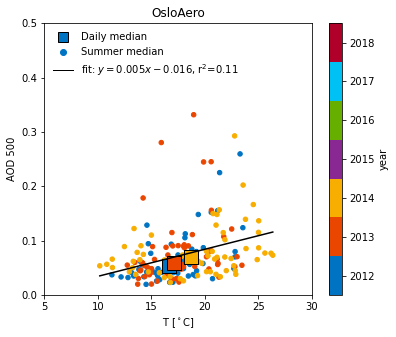

In [271]:
v_x = 'T_C'
v_y = 'DOD500'
ca = cases_orig[0]
df_s = dic_df[ca].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,0.5]
xlab = r'T [$^\circ$C]'
ylab = r'AOD 500'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.3632501149394265
intercept: [-0.11532973]
slope: [[0.01544327]]
Plots/scat_OBS_T _AOD_340 nm.png


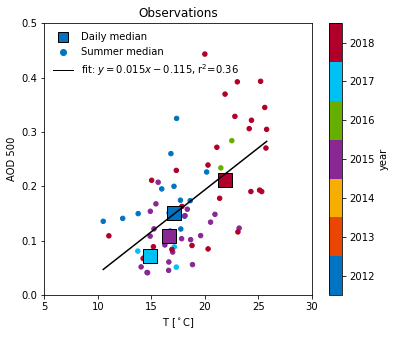

In [265]:

v_x = 'T (degree C)'
v_y = 'AOD_340 nm'
ca ='OBS'
df_s = df_hyy_1.loc['2012':'2018']

df_sy = df_hyy_1y.loc['2012':'2018'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,0.5]
xlab = r'T [$^\circ$C]'
ylab = r'AOD 500'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

No handles with labels found to put in legend.


coefficient of determination: 0.155559594477227
intercept: [-0.06861338]
slope: [[0.01382522]]


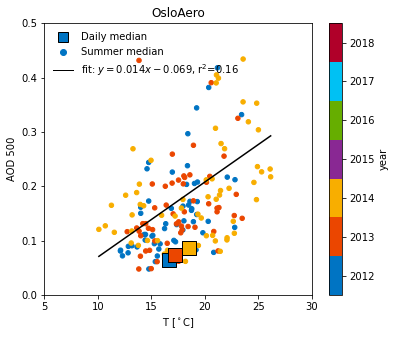

In [275]:
v_x = 'T_C'
v_y = 'DOD440'
ca = cases_sec[0]
df_s = dic_df[ca].loc['2012':].copy()
df_s[v_y] = df_s[v_y]*2.
df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,0.5]
xlab = r'T [$^\circ$C]'
ylab = r'AOD 500'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.2668240488920308
intercept: [-0.04506379]
slope: [[0.0078805]]
Plots/scat_OBS_T _AOD_500 nm.png


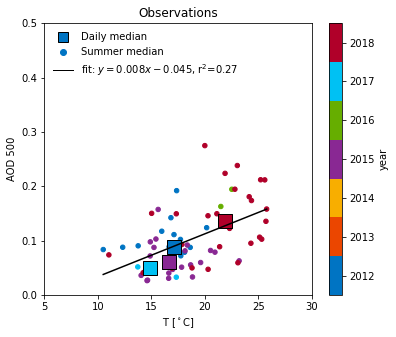

In [133]:

v_x = ''
v_y = 'AOD_500 nm'
ca ='OBS'
df_s = df_hyy_1.loc['2012':'2018']

df_sy = df_hyy_1y.loc['2012':'2018'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,0.5]
xlab = r'T [$^\circ$C]'
ylab = r'AOD 500'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

No handles with labels found to put in legend.


coefficient of determination: 0.5225424556311591
intercept: [-1176.73]
slope: [[99.485245]]
Plots/scat_OsloAero_intBVOC_f19_f19_T_C_N100.png


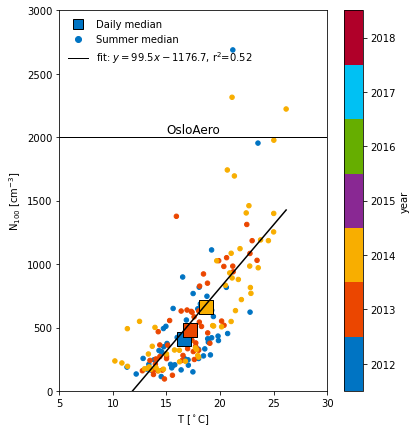

In [43]:
v_x = 'T_C'
v_y = 'N100'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,3000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.text(15,2030, 'OsloAero', size=12)

fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

No handles with labels found to put in legend.


coefficient of determination: 0.5050392803771455
intercept: [-530.23737013]
slope: [[68.31557758]]
Plots/scat_OBS_T _N100 .png


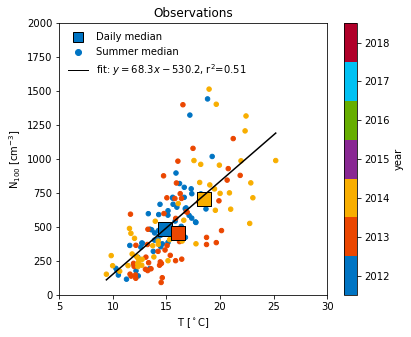

In [44]:

v_x = 'T (degree C)'
v_y = 'N100 (cm^-3)'
ca ='OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,2000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

## OA vs N100

No handles with labels found to put in legend.


coefficient of determination: 0.7329804982825727
intercept: [160.16024689]
slope: [[139.8336719]]


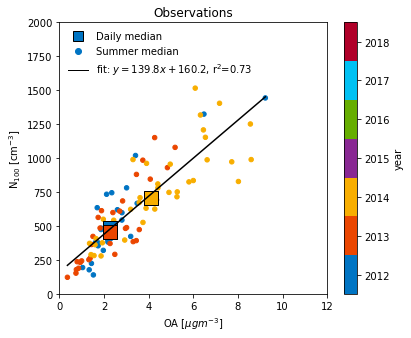

In [45]:

v_x = 'OA (microgram m^-3)'
v_y = 'N100 (cm^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [0,12]
ylims = [0,2000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.8943621140466352
intercept: [23.419922]
slope: [[265.58127]]


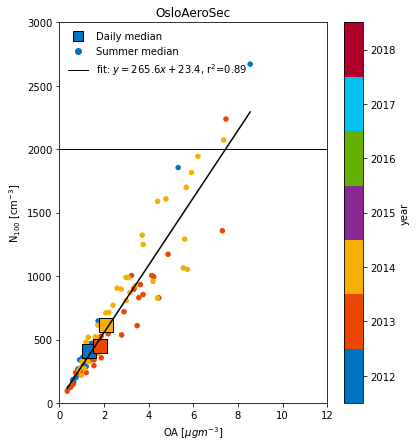

In [46]:
v_x = 'OA'
v_y = 'N100'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,3000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.9141617538665362
intercept: [1.6020508]
slope: [[285.87662]]


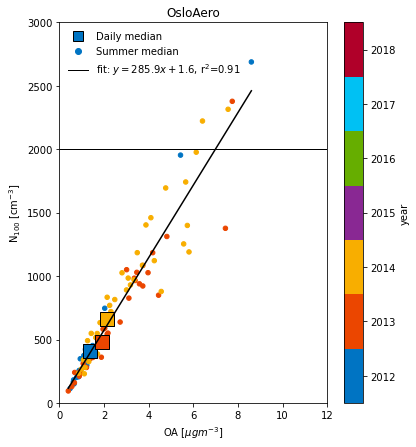

In [47]:
v_x = 'OA'
v_y = 'N100'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,3000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## T vs OA

No handles with labels found to put in legend.


coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


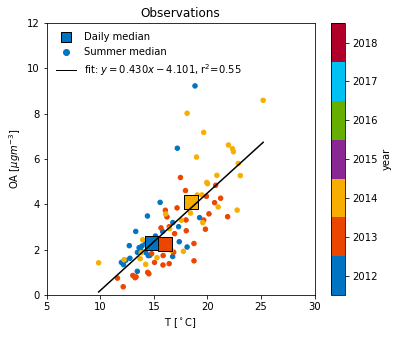

In [48]:
v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [50]:
df_s.head()

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450


In [51]:
df_s.head()

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450


In [54]:
df_s['SOA']

date
2012-07-01    0.805518
2012-07-02    0.595239
2012-07-03    0.741434
2012-07-04    1.293229
2012-07-05    1.689286
                ...   
2014-08-11    2.137882
2014-08-12    0.582894
2014-08-13    0.406330
2014-08-14    0.618862
2014-08-15    0.972438
Name: SOA, Length: 102, dtype: float32

No handles with labels found to put in legend.


coefficient of determination: 0.4118001471634899
intercept: [-14.032738]
slope: [[1.1681206]]


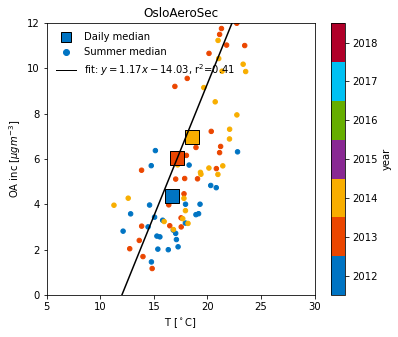

In [55]:
v_x = 'T_C'
v_y = 'OA_inc'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':].copy()

df_s['OA_inc'] = 3.3*df_s['SOA'] + df_s['POA']


df_sy = dic_df_sm[ca].loc['2012':].copy()
df_sy['OA_inc'] =df_sy['SOA']*3.3 + df_sy['POA']

xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA inc [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.444653823161968
intercept: [-7.8336067]
slope: [[0.6337054]]


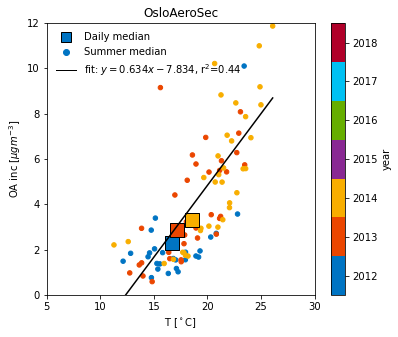

In [57]:
v_x = 'T_C'
v_y = 'OA_inc'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':].copy()

df_s['OA_inc'] = 2.*df_s['SOA'] + df_s['POA']


df_sy = dic_df_sm[ca].loc['2012':].copy()
df_sy['OA_inc'] =df_sy['SOA']*2. + df_sy['POA']

xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA inc [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.4601016212056842
intercept: [-3.6554441]
slope: [[0.28379285]]


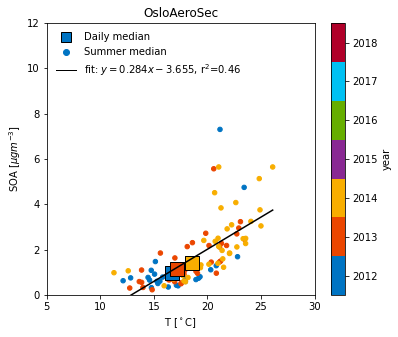

In [414]:
v_x = 'T_C'
v_y = 'SOA'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'SOA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.020258410843715713
intercept: [0.23738864]
slope: [[0.0225909]]


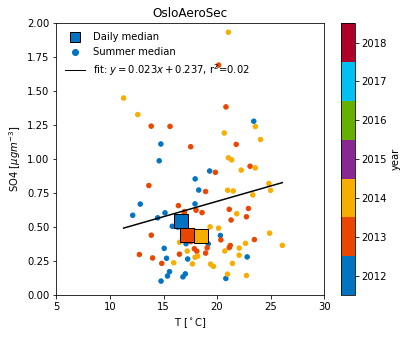

In [415]:
v_x = 'T_C'
v_y = 'SO4'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,2]
xlab = r'T [$^\circ$C]'
ylab = r'SO4 [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


## POA:

No handles with labels found to put in legend.


coefficient of determination: 0.07683737459630924
intercept: [-0.5227183]
slope: [[0.06611961]]


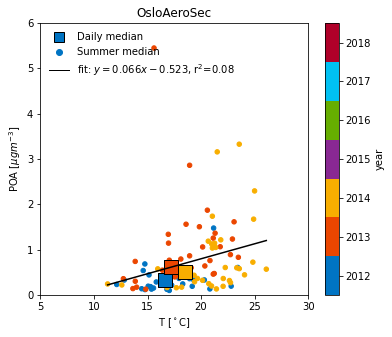

In [416]:
v_x = 'T_C'
v_y = 'POA'
ca = cases_sec[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,6]
xlab = r'T [$^\circ$C]'
ylab = r'POA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)


No handles with labels found to put in legend.


coefficient of determination: 0.41920273454752377
intercept: [-4.4137573]
slope: [[0.3642034]]


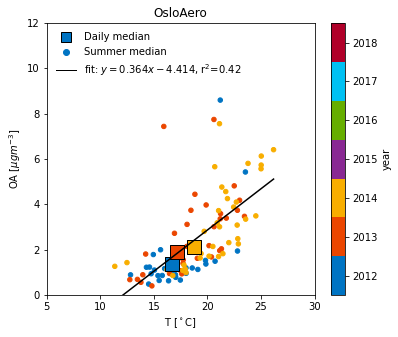

In [417]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

No handles with labels found to put in legend.


coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


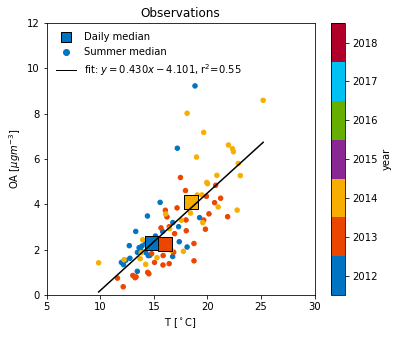

In [418]:
v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014']
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [419]:
df_hyy_1y

,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,
2012,2012,14.819834,2.286611,485.015920
2013,2013,16.061833,2.266324,458.851509
2014,2014,18.469334,4.102861,706.239261
2015,2015,14.949500,2.167607,499.026618
2016,2016,13.959500,1.693031,418.417730
2017,2017,13.619333,1.845648,409.297699
2018,2018,17.848833,3.366803,770.183131


## All data: 

No handles with labels found to put in legend.


coefficient of determination: 0.63075713228574
intercept: [-3.92871075]
slope: [[0.42275072]]


(<Figure size 432x360 with 2 Axes>,
 <AxesSubplot:xlabel='T [$^\\circ$C]', ylabel='OA [$\\mu g m^{-3}$]'>)

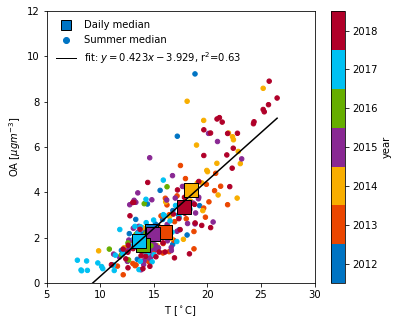

In [420]:

v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = cases_orig[0]
df_s = df_hyy_1

df_sy = df_hyy_1y#df_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

## Only to 2014

In [ ]:

v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = cases_orig[0]
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc[0:2] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

In [ ]:
df_hyy_1y.loc['2012':'2014']

In [ ]:
df_hyy_1.loc['2012':'2014']

In [ ]:

df_1 = dic_df[cases_sec[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c)|('lon_' in c))], axis=1)
df_2 = dic_df[cases_orig[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c)|('lon_' in c))], axis=1)
df_1.head()

df_mod_dic = dict(OsloAeroSec=df_1, OsloAero = df_2)

In [ ]:

df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
plt.legend()
plt.xlim([0,2000])
plt.show()
df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()
plt.xlim([0,2000])
plt.show()
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')
plt.legend()
plt.xlim([0,2000])

In [ ]:
#df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
#df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')

(-df_hyy_1['N100 (cm^-3)']+df_1['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
(-df_hyy_1['N100 (cm^-3)']+df_2['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()

In [ ]:
def 

In [ ]:
dic_vars =dict(
    N100='N100 (cm^-3)',
    OA = 'OA (microgram m^-3)',
    T_C = 'T (degree C)',
)

In [ ]:
df_1

In [ ]:

def get_common_df(v):
    ls =list()
    for m in df_mod_dic.keys():
        _df = df_mod_dic[m]
        ls.append(_df[v].rename(m))
    ls.append(df_hyy_1[dic_vars[v]].rename('Obs'))
    df_o = pd.concat(ls,axis=1)
    df_o['year'] = df_o.index.year
    return df_o

In [ ]:
df_100 = get_common_df('N100')

df_100 = df_100.loc['2012-01-01':'2014-01-01']

In [ ]:
def add_reg(v_x, v_y, df_s, ax):
    _df = df_s[~df_s.isnull().any(axis=1)]
    x = np.array(_df[v_x].values).reshape(-1,1)
    y=np.array(_df[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    lab = r'fit: $y= %.3fx+ %.3f$, r2=%.2f' %(a,b,r_sq)
    li = ax.plot(x_s, (a*x_s + b), c='k')
    return lab, li

In [ ]:
df_100[~df_100.isnull().any(axis=1)]

In [ ]:
li[0]

In [ ]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAeroSec'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

In [ ]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAero'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

In [ ]:
df_OA = get_common_df('OA')

df_OA = df_OA.loc['2012-01-01':'2014-01-01']

In [ ]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


In [ ]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


In [ ]:
df_TC = get_common_df('T_C')

df_TC = df_TC.loc['2012-01-01':'2014-01-01']

In [ ]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)


In [ ]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)
